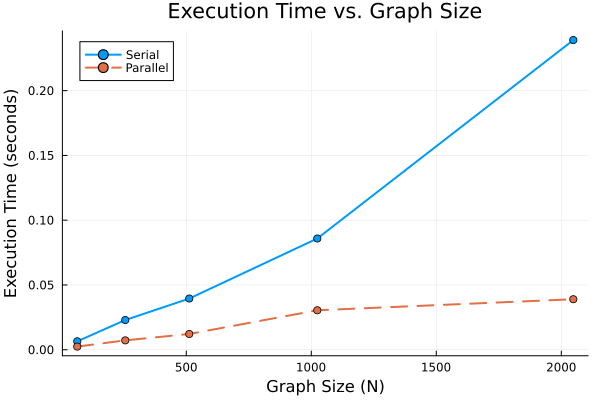

In [4]:
using Revise
includet("ObserverGraph.jl")
includet("Propagation.jl")
includet("Localization.jl")
includet("Visuals.jl")
using Random
using Plots
using .ObserverGraph
using .Propagation

# Function to measure execution time
function measure_execution_time(func, og, beta)
    return @elapsed func(og, beta)
end

# Sample parameters for the experiment
N_values = [64, 256, 512, 1024, 2048]  # Different sizes of the observer graph
n0 = 2
k = 1
frac_observers = 0.1
beta = 0.1

# Arrays to store execution times
serial_times = Float64[]
parallel_times = Float64[]

# Loop through different N values and measure execution times
for N in N_values
    # Create observer graph
    og::ObsGraph = make_BA_obs_graph(N, n0, k, frac_observers)
    
    # Measure time for serial version
    serial_time = measure_execution_time(propagate_SI!, og, beta)
    push!(serial_times, serial_time)
    
    # Measure time for parallel version
    parallel_time = measure_execution_time(propagate_SI_parallel!, og, beta)
    push!(parallel_times, parallel_time)
end

# Plot the results
plot(N_values, serial_times, label="Serial", xlabel="Graph Size (N)", ylabel="Execution Time (seconds)", linewidth=2, marker=:circle)
plot!(N_values, parallel_times, label="Parallel", linewidth=2, linestyle=:dash, marker=:circle)
# Set logarithmic scale for x-axis
# xaxis!(:log2)

# Optionally, set a title and adjust other plot aesthetics
title!("Execution Time vs. Graph Size")
